<a href="https://colab.research.google.com/github/Bix4UMD/BIOI611_lab/blob/main/docs/BIOI611_introR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to R

### What is R

R is a language and environment for statistical computing and graphics.

* Runs on a variaty of operation systerms: Windows, Linux and MacOS

* Generates publication-ready plots

* Owns a large open-source community

* Extends functions as packages


### Essetnial concepts for programming languages

#### Variables

Variable names can have letters, dots and undercores (e.g. `gene_name`, "csvfile.1" and `chr1`).

#### Functions

A function is a structured, reusable segment of code designed to carry out a specific set of operations. It can accept zero or more inputs (parameters) and can produce an output (result).

`INPUT --function--> OUTPUT`

The way to define a function is:

```
read_star_file <- function(file_path){
    ...code goes here...
    return(df)
}
```

The way to use a function in R is:
```
read_star_file(paths)
```







### Basic data types

In [1]:
# assign a number to variable gene_count
gene1 <- 150
gene2 <- 200
gene1
gene2

[1] 150

[1] 200

In [2]:
# Examples of character value
gene_name1 <- "KRAS"
gene_name1

[1] "KRAS"

In [ ]:
# Examples of character value
"RAS" -> gene_name2
gene_name2

[1] "RAS"

In [ ]:
# Examples of character value
gene_name3 <- "KRAS"
gene_name3

[1] "KRAS"

In [4]:
# Logical value
gene1 > gene2
gene1 < gene2
bool_val = gene1 < gene2
bool_val

[1] FALSE

[1] TRUE

[1] TRUE

In [ ]:
class(gene1)
class(gene_name)
class()

[1] "numeric"

[1] "character"

### Basic data structure


An atomic vector is a collection of multiple values (numeric, character, or logical) stored in a single object. You can create an atomic vector using the c() function.

In [5]:
sample_names <- c("N2_day1_rep1",	"N2_day1_rep2", "N2_day1_rep3",
                  "N2_day7_rep1", "N2_day7_rep2", "N2_day7_rep3")
sample_names

[1] "N2_day1_rep1" "N2_day1_rep2" "N2_day1_rep3" "N2_day7_rep1" "N2_day7_rep2"
[6] "N2_day7_rep3"

In [7]:
group <- gsub("_rep\\d", "", sample_names)
group

[1] "N2_day1" "N2_day1" "N2_day1" "N2_day7" "N2_day7" "N2_day7"

In [8]:
rep <- gsub("N2_day\\d_rep", "", sample_names)
rep

[1] "1" "2" "3" "1" "2" "3"

In [ ]:
coldata_df <- cbind(group = gsub("_rep\\d", "", sample_names))
coldata_df

group
N2_day1
N2_day1
N2_day1
N2_day7
N2_day7
N2_day7


In [9]:
coldata_df <- cbind(group = gsub("_rep\\d", "", sample_names), rep = gsub("N2_day\\d_rep", "", sample_names))
coldata_df

group,rep
N2_day1,1
N2_day1,2
N2_day1,3
N2_day7,1
N2_day7,2
N2_day7,3


In [10]:
rownames(coldata_df)

NULL

In [11]:
rownames(coldata_df) = sample_names
coldata_df

,group,rep
N2_day1_rep1,N2_day1,1
N2_day1_rep2,N2_day1,2
N2_day1_rep3,N2_day1,3
N2_day7_rep1,N2_day7,1
N2_day7_rep2,N2_day7,2
N2_day7_rep3,N2_day7,3


In [12]:
t(coldata_df)

,N2_day1_rep1,N2_day1_rep2,N2_day1_rep3,N2_day7_rep1,N2_day7_rep2,N2_day7_rep3
group,N2_day1,N2_day1,N2_day1,N2_day7,N2_day7,N2_day7
rep,1,2,3,1,2,3


In [ ]:
is.matrix(coldata_df)
coldata_df <- as.data.frame(coldata_df)
is.data.frame(coldata_df)

[1] TRUE

[1] TRUE

 A matrix can contain either character or numeric columns and a dataframe can contain both numeric and character columns.

A list is an ordered collection of objects, which can be any type of R objects (vectors, matrices, data frames, even lists).


In [ ]:
count_files = list("sample" = 'N2_day1_rep1.ReadsPerGene.out.tab', "sample2"='N2_day1_rep2.ReadsPerGene.out.tab')
count_files

$sample
[1] "N2_day1_rep1.ReadsPerGene.out.tab"

$sample2
[1] "N2_day1_rep2.ReadsPerGene.out.tab"

In [ ]:
gene_count = list("gene1" = 10, "gene2"=20)

In [ ]:
lapply(gene_count, function(x){log2(x+1)})

$gene1
[1] 3.459432

$gene2
[1] 4.392317

In [ ]:
log2_transform <- function(x){
    log2(x+1)
}
lapply(gene_count, log2_transform)

$gene1
[1] 3.459432

$gene2
[1] 4.392317

### Dealing with text files

In [ ]:
getwd()
#setwd()

[1] "/content"

In [ ]:
list.files()

[1] "N2_day1_rep1.ReadsPerGene.out.tab" "N2_day1_rep2.ReadsPerGene.out.tab"
[3] "N2_day1_rep3.ReadsPerGene.out.tab" "N2_day7_rep1.ReadsPerGene.out.tab"
[5] "N2_day7_rep2.ReadsPerGene.out.tab" "N2_day7_rep3.ReadsPerGene.out.tab"
[7] "sample_data"

In [ ]:
file_paths <- list.files(pattern = "*..ReadsPerGene.out.tab")
file_paths

[1] "N2_day1_rep1.ReadsPerGene.out.tab" "N2_day1_rep2.ReadsPerGene.out.tab"
[3] "N2_day1_rep3.ReadsPerGene.out.tab" "N2_day7_rep1.ReadsPerGene.out.tab"
[5] "N2_day7_rep2.ReadsPerGene.out.tab" "N2_day7_rep3.ReadsPerGene.out.tab"

In [ ]:
tab_N2_day1_rep1 <- read.table('N2_day1_rep1.ReadsPerGene.out.tab')
head(tab_N2_day1_rep1, 5)

,V1,V2,V3,V4
,<chr>,<int>,<int>,<int>
1,N_unmapped,1332776,1332776,1332776
2,N_multimapping,1540190,1540190,1540190
3,N_noFeature,157102,19017455,18933214
4,N_ambiguous,536422,128854,120342
5,WBGene00000003,341,161,180


In [ ]:
tab_N2_day1_rep2 <- read.table('N2_day1_rep2.ReadsPerGene.out.tab')
head(tab_N2_day1_rep2,5)

,V1,V2,V3,V4
,<chr>,<int>,<int>,<int>
1,N_unmapped,1400596,1400596,1400596
2,N_multimapping,1305129,1305129,1305129
3,N_noFeature,152183,15009786,14975925
4,N_ambiguous,439830,104631,98489
5,WBGene00000003,415,198,217


In [ ]:
tab_N2_day1_rep3 <- read.table('N2_day1_rep3.ReadsPerGene.out.tab')
head(tab_N2_day1_rep3,5)

,V1,V2,V3,V4
,<chr>,<int>,<int>,<int>
1,N_unmapped,5887223,5887223,5887223
2,N_multimapping,1557570,1557570,1557570
3,N_noFeature,184441,17612359,17574940
4,N_ambiguous,514559,122385,115498
5,WBGene00000003,411,175,236


In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
tab_N2_day1_rep1 <- tab_N2_day1_rep1 %>% select(V1, V2)
head(tab_N2_day1_rep1, 5)
tab_N2_day1_rep2 <- tab_N2_day1_rep2[, c("V1", "V2")]
head(tab_N2_day1_rep2, 5)
tab_N2_day1_rep3 <- tab_N2_day1_rep3[, c("V1", "V2")]
head(tab_N2_day1_rep3, 5)

,V1,V2
,<chr>,<int>
1,N_unmapped,1332776
2,N_multimapping,1540190
3,N_noFeature,157102
4,N_ambiguous,536422
5,WBGene00000003,341


,V1,V2
,<chr>,<int>
1,N_unmapped,1400596
2,N_multimapping,1305129
3,N_noFeature,152183
4,N_ambiguous,439830
5,WBGene00000003,415


,V1,V2
,<chr>,<int>
1,N_unmapped,5887223
2,N_multimapping,1557570
3,N_noFeature,184441
4,N_ambiguous,514559
5,WBGene00000003,411


In [ ]:
df_merged <- merge(tab_N2_day1_rep1, tab_N2_day1_rep2, by = "V1")
head(df_merged)
df_merged <- merge(df_merged, tab_N2_day1_rep3, by = "V1")
head(df_merged)

,V1,V2.x,V2.y
,<chr>,<int>,<int>
1,N_ambiguous,536422,439830
2,N_multimapping,1540190,1305129
3,N_noFeature,157102,152183
4,N_unmapped,1332776,1400596
5,WBGene00000001,3227,2168
6,WBGene00000002,270,203


,V1,V2.x,V2.y,V2
,<chr>,<int>,<int>,<int>
1,N_ambiguous,536422,439830,514559
2,N_multimapping,1540190,1305129,1557570
3,N_noFeature,157102,152183,184441
4,N_unmapped,1332776,1400596,5887223
5,WBGene00000001,3227,2168,2589
6,WBGene00000002,270,203,266


The `Reduce()` function in R allows us to apply a function repeatedly to a list of elements. Here, we are applying `merge()` iteratively to a list of data frames.

In [ ]:
df_mer_red <- Reduce(function(x, y) merge(x, y, by = "V1"),
                        list("tab_N2_day1_rep1" = tab_N2_day1_rep1,
                             "tab_N2_day1_rep2" = tab_N2_day1_rep2,
                             "tab_N2_day1_rep3" = tab_N2_day1_rep3))
head(df_mer_red, 5)

,V1,V2.x,V2.y,V2
,<chr>,<int>,<int>,<int>
1,N_ambiguous,536422,439830,514559
2,N_multimapping,1540190,1305129,1557570
3,N_noFeature,157102,152183,184441
4,N_unmapped,1332776,1400596,5887223
5,WBGene00000001,3227,2168,2589


## Producing Graphs with R


### Producing Graphs using basic

#### Line charts


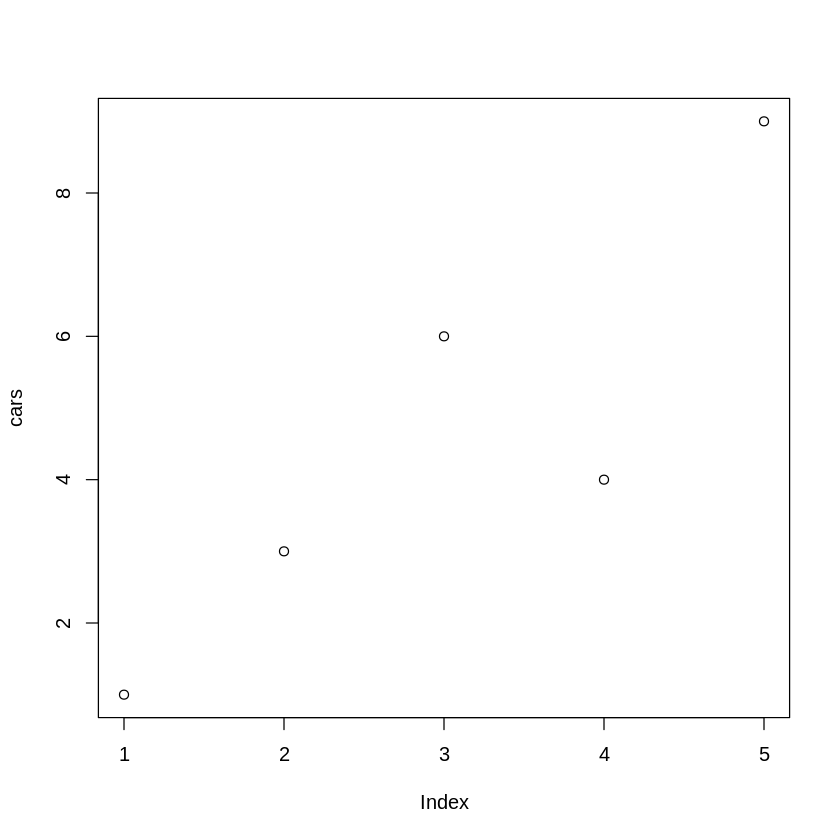

In [ ]:
# Define the cars vector with 5 values
cars <- c(1, 3, 6, 4, 9)

# Graph the cars vector with all defaults
plot(cars)

Let's add a title, a line to connect the points, and some color:



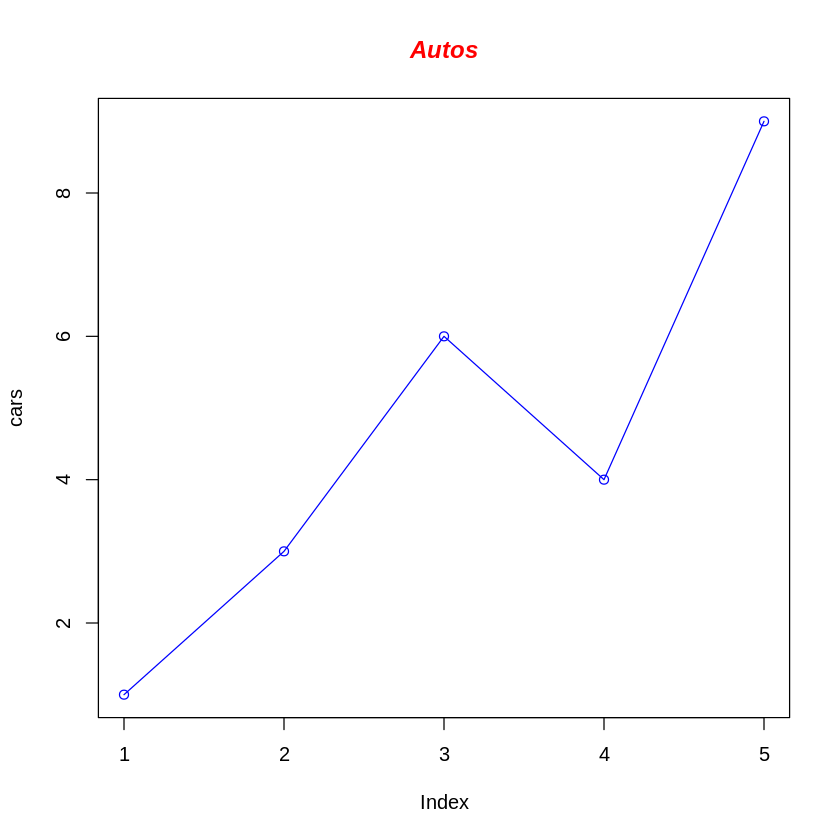

In [ ]:
# Define the cars vector with 5 values
cars <- c(1, 3, 6, 4, 9)

# Graph cars using blue points overlayed by a line
plot(cars, type="o", col="blue")

# Create a title with a red, bold/italic font
title(main="Autos", col.main="red", font.main=4)

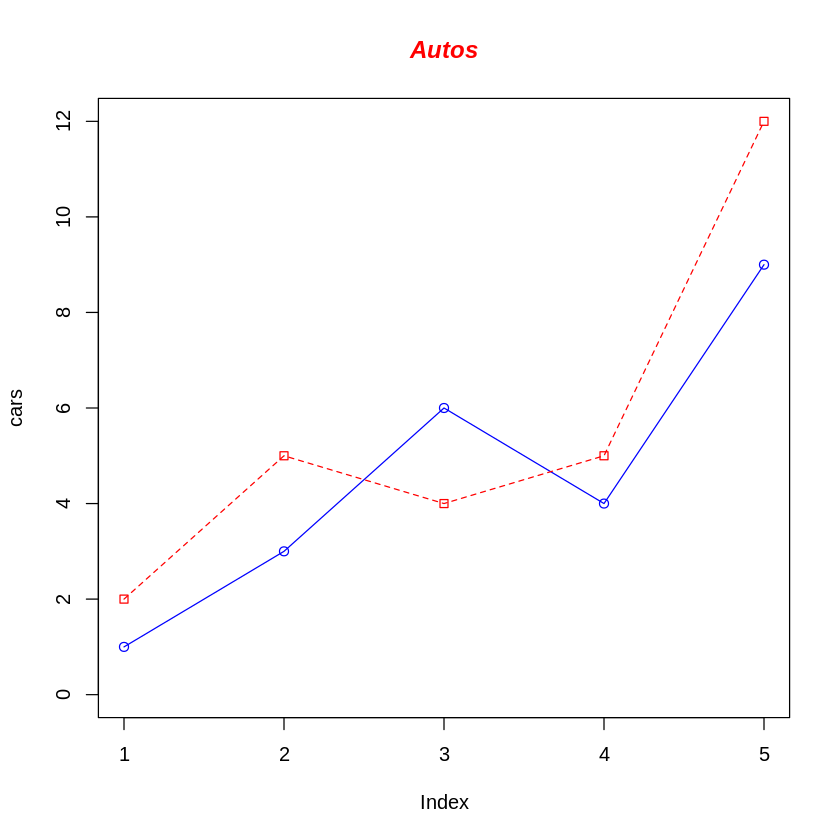

In [ ]:
# Define 2 vectors
cars <- c(1, 3, 6, 4, 9)
trucks <- c(2, 5, 4, 5, 12)

# Graph cars using a y axis that ranges from 0 to 12
plot(cars, type="o", col="blue", ylim=c(0,12))

# Graph trucks with red dashed line and square points
lines(trucks, type="o", pch=22, lty=2, col="red")

# Create a title with a red, bold/italic font
title(main="Autos", col.main="red", font.main=4)

In [ ]:
csv_url <- "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"

In [ ]:
mtcars <- read.csv(csv_url)
mtcars

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


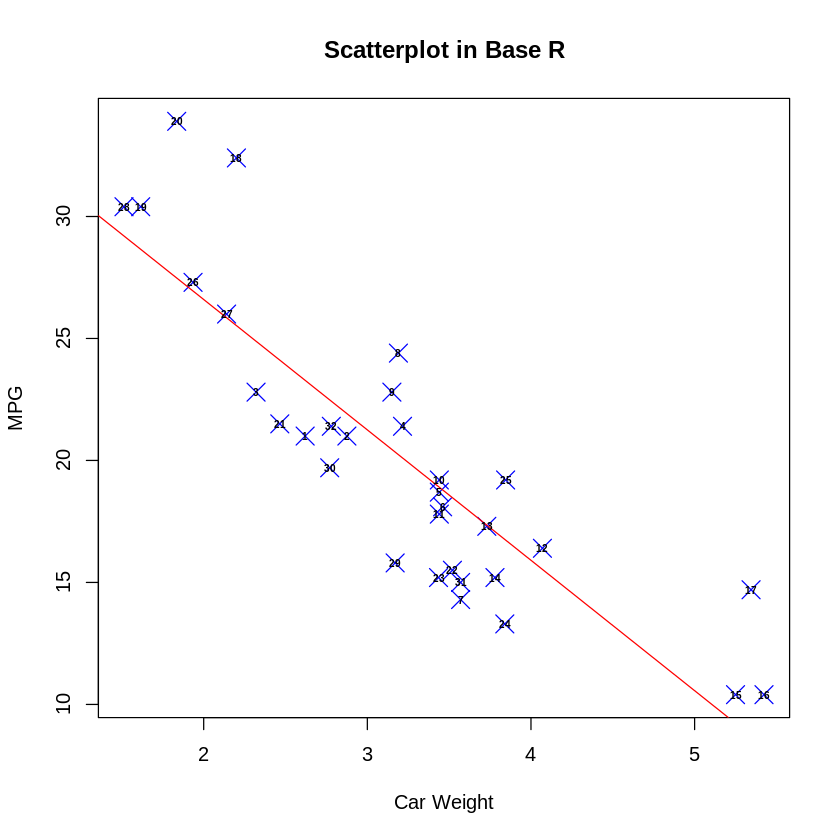

In [ ]:
plot(mtcars$wt,mtcars$mpg, main="Scatterplot in Base R",
   xlab="Car Weight", ylab="MPG",
   pch=4, col = "blue", lwd=1, cex = 2)
abline(lm(mtcars$mpg~mtcars$wt), col="red")
text(mtcars$wt, mtcars$mpg, labels=rownames(mtcars), cex=0.5, font=2)

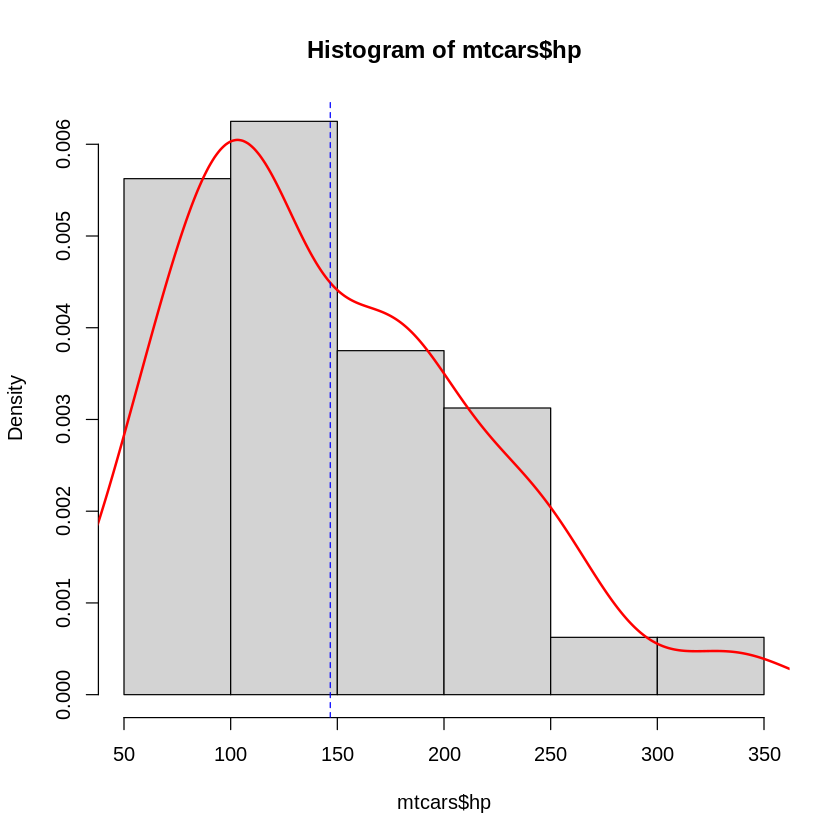

In [ ]:
hist(mtcars$hp,
      prob = TRUE)
lines(density(mtcars$hp), # density plot
     lwd = 2, # thickness of line
     col = "red")
abline(v=mean(mtcars$hp),
     lty="dashed",
     col="blue")

`Probability Density`: It tells you how the data is distributed over different ranges (or bins) of values. The height of each bar shows how densely the data is packed in that range of horsepower values.

#### Producing graphs using ggplot2

In [ ]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


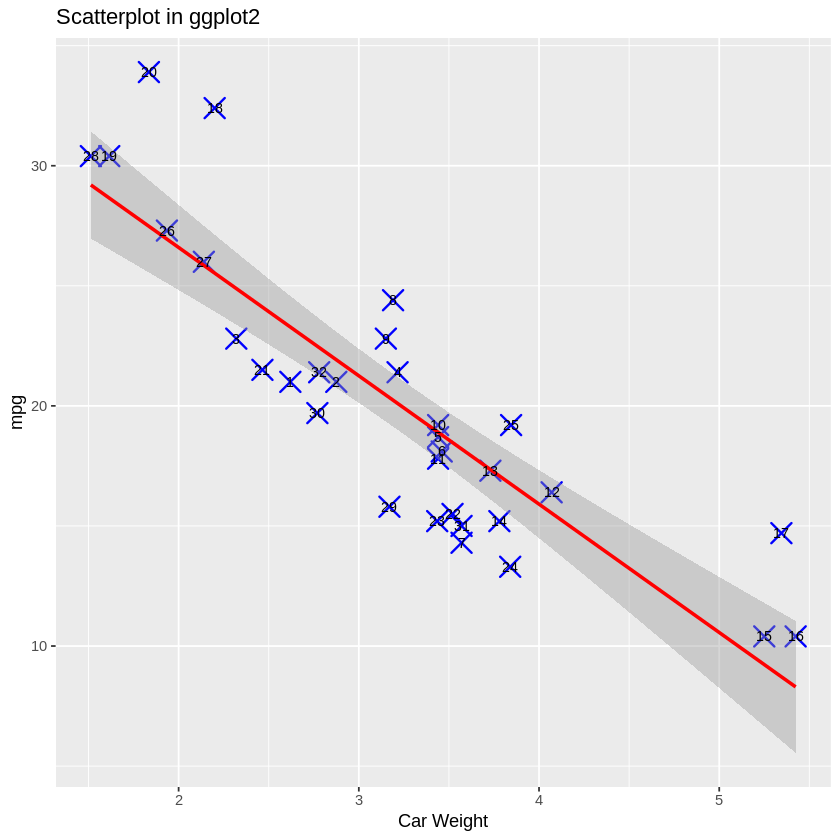

In [ ]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point(size=5, shape=4, color="blue", stroke=1) +
  geom_smooth(method=lm, color="red") +
  ggtitle("Scatterplot in ggplot2") +
  xlab("Car Weight") + # for the x axis label
  geom_text(label=rownames(mtcars),cex=3)

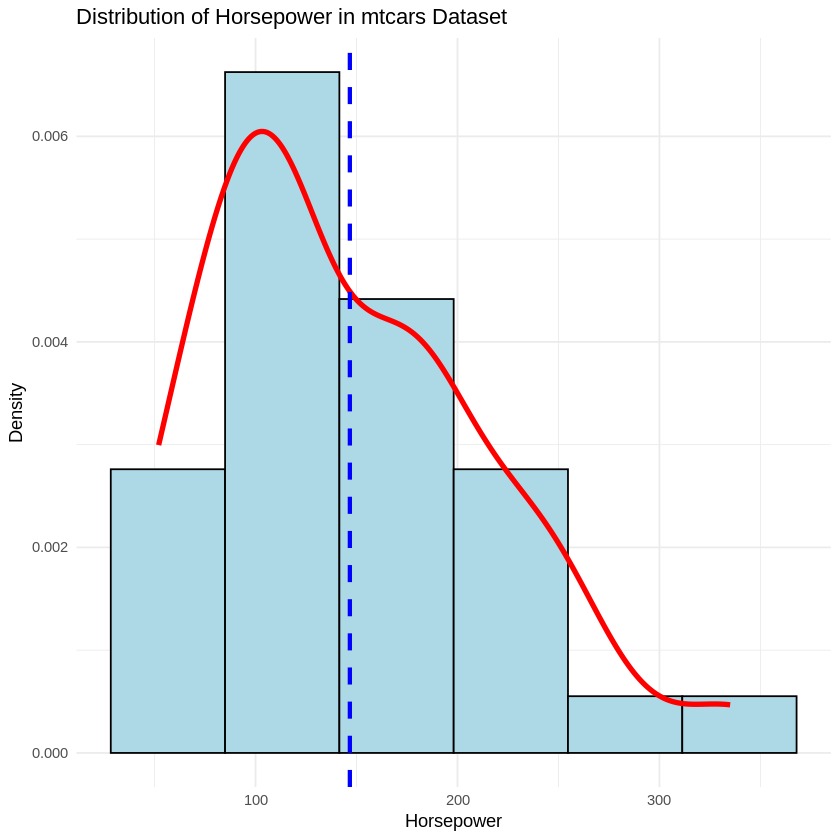

In [ ]:
ggplot(mtcars, aes(x = hp)) +
  geom_histogram(aes(y = ..density..),
                 bins = 6, # You can adjust the number of bins
                 fill = "lightblue",
                 color = "black") +  # Histogram with probability density
  geom_density(color = "red", size = 1.5) +  # Add the density plot
  geom_vline(aes(xintercept = mean(hp)),
             linetype = "dashed",
             color = "blue",
             size = 1.2) +  # Add dashed blue vertical line at the mean
  labs(title = "Distribution of Horsepower in mtcars Dataset",
       x = "Horsepower",
       y = "Density") +  # Add axis labels and title
  theme_minimal() # Use a clean theme for the plot


## Reference

https://sites.harding.edu/fmccown/R/

https://jtr13.github.io/cc21fall2/base-r-vs.-ggplot2-visualization.html#base-r-vs.-ggplot2-visualization